# Fixed Income Coding Challenge - Spring 2025

Directions: For part 1 of this challenge, you will be given a dataset of annualized yields that correspond to bonds of different maturities. Each bond also has multiple yields that span the years 2015-2025. The bonds pay coupons at a semi-annual rate. You will be generating spot rates from these coupon rates using bootstrapping. For part 2, you will  construct an interest rate model to forecast the short-term price evolution as well as calculate duration and convexity to price bonds. More detail is given in each of the parts below. Feel free to add any additional helper functions where you see fit.

In [ ]:
'''
Name: Sahana Ali
'''

## Data/Libraries

Load your data and libraries in here:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Part 1: Bootstrapping

In the first part, your goal is to utilize bootstrapping to obtain the spot rate for each bond at each point in time. You will be using the data 'yield_data.csv' which contains the coupon rates and prices for each bond. The spot rate (also known as the zero rate) is the rate of return that the investor earns without collecting coupon payments. Bootstrapping is a method used for obtaining spot rates for fixed-income instruments that pay coupons. Using these spot rates, you are to generate a spot rate curve for each year (so 11 total spot rate curves). Note down any insights you observe.

Please write the following functions:

bootstrapped_rates: For every bond, calculate the zero rate using the bootstrapping method. For example, you will have to get the spot rate for the 1 year from 2015, the 2 year from 2015, etc until and including the bonds from the last year (2025). You can choose how you want to return these rates.

plot_spot: For each year, plot out the rates you obtained from bootstrapped_rates. You will have to do this for each year (all bonds from 2015, 2016, etc), so you should have 11 graphs total.

    start_date   1YR   PX_1   2YR    PX_2   3YR   PX_3   5YR   PX_5   7YR  \
0   2015-01-01  0.20  99.75  0.55   99.92  0.90  99.85  1.37  99.82  1.67   
1   2016-01-01  0.54  99.32  0.90   99.78  1.14  99.86  1.52  99.42  1.85   
2   2017-01-01  0.83  99.12  1.21   99.83  1.48  99.72  1.92  99.46  2.23   
3   2018-01-01  1.80  98.20  2.03   99.87  2.15  99.77  2.38  99.72  2.51   
4   2019-01-01  2.58  97.46  2.54   99.81  2.52  99.83  2.54  99.65  2.61   
5   2020-01-01  1.53  98.49  1.52   99.87  1.52  99.80  1.56  99.65  1.67   
6   2021-01-01  0.10  99.91  0.13  100.00  0.20  99.67  0.45  99.76  0.77   
7   2022-01-01  0.55  99.36  0.98   99.77  1.25  99.67  1.54  99.84  1.70   
8   2023-01-01  4.69  95.48  4.21   99.97  3.91  99.71  3.64  99.86  3.59   
9   2024-01-01  4.79  95.38  4.32   99.78  4.11  99.71  3.98  99.75  4.03   
10  2025-01-01  4.18  95.93  4.27   99.84  4.33  99.77  4.43  99.64  4.53   

      PX_7  10YR   PX_10  
0    99.41  1.88   99.10  
1    99.94  2.09   98

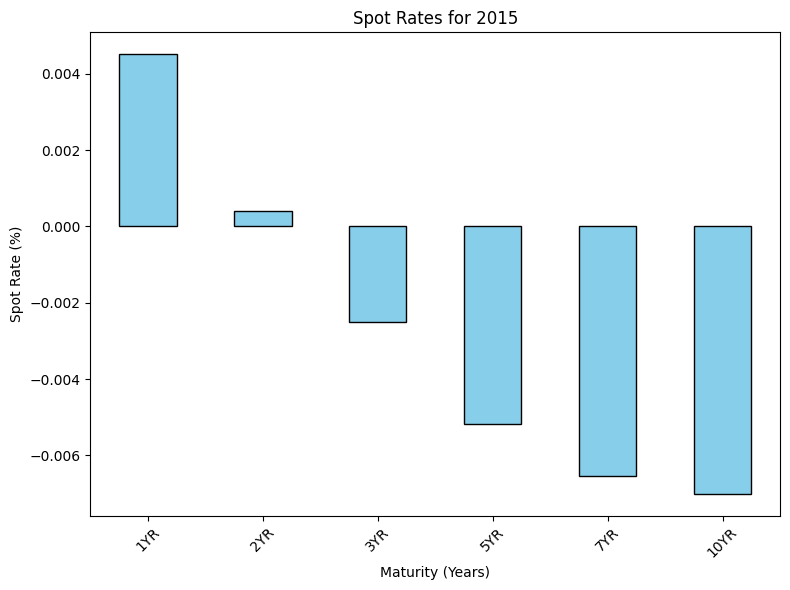

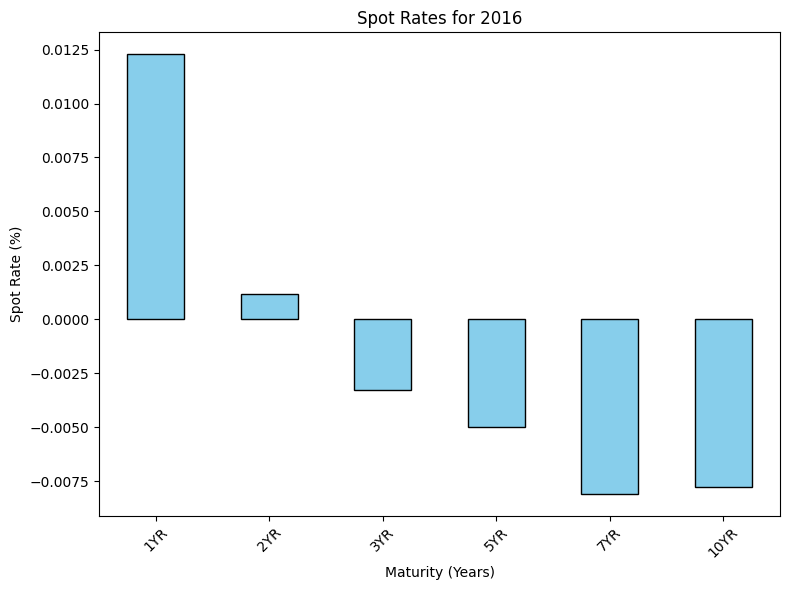

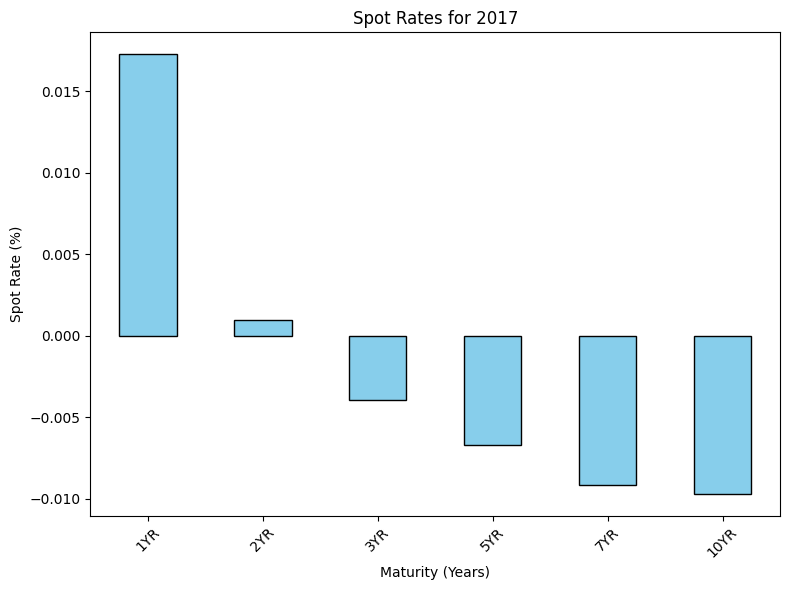

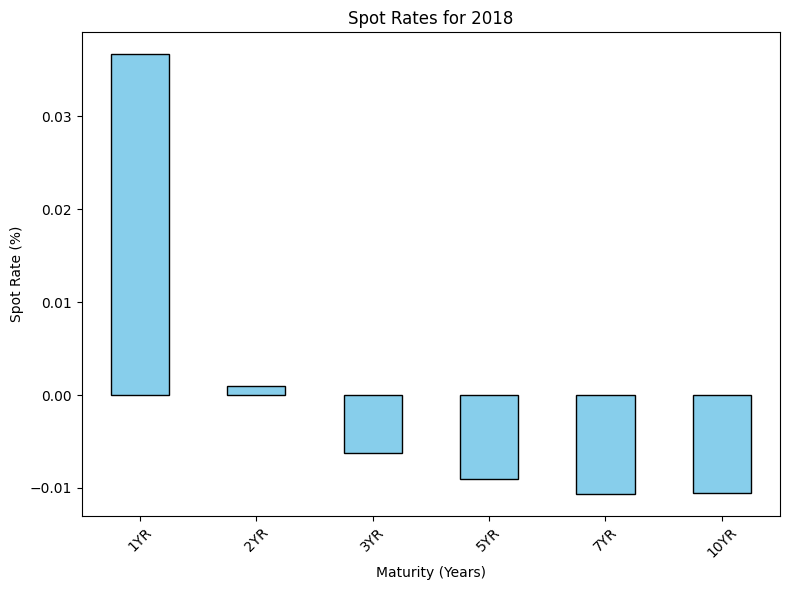

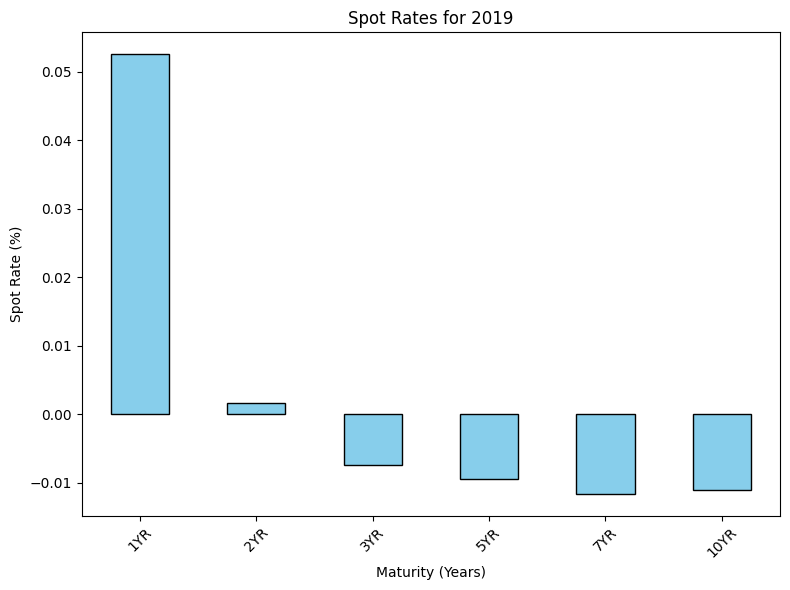

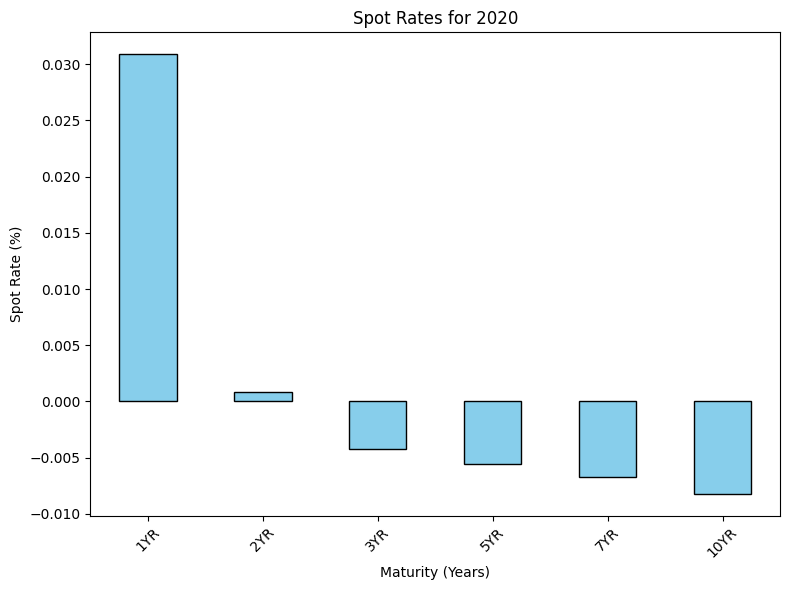

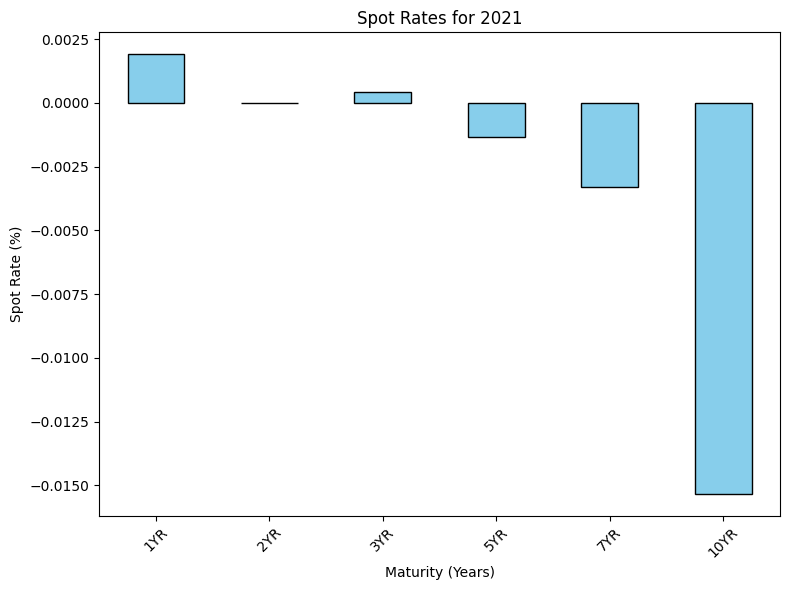

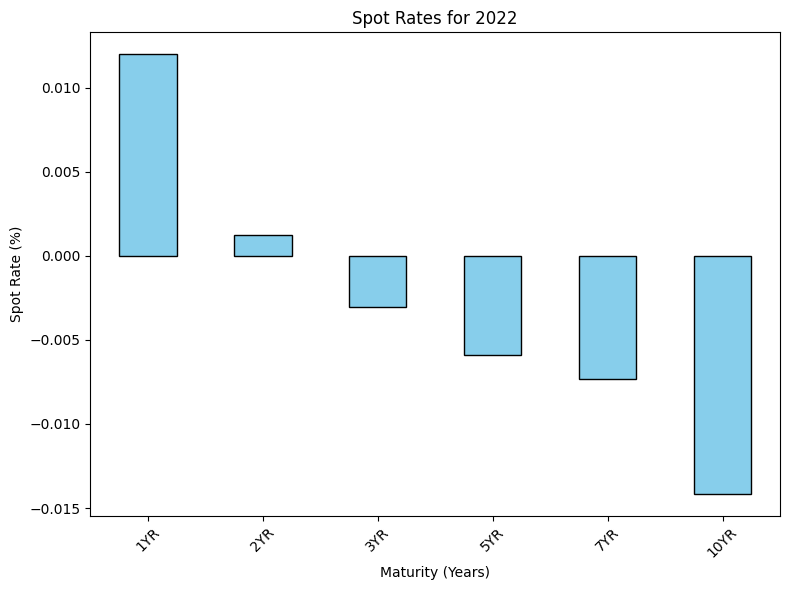

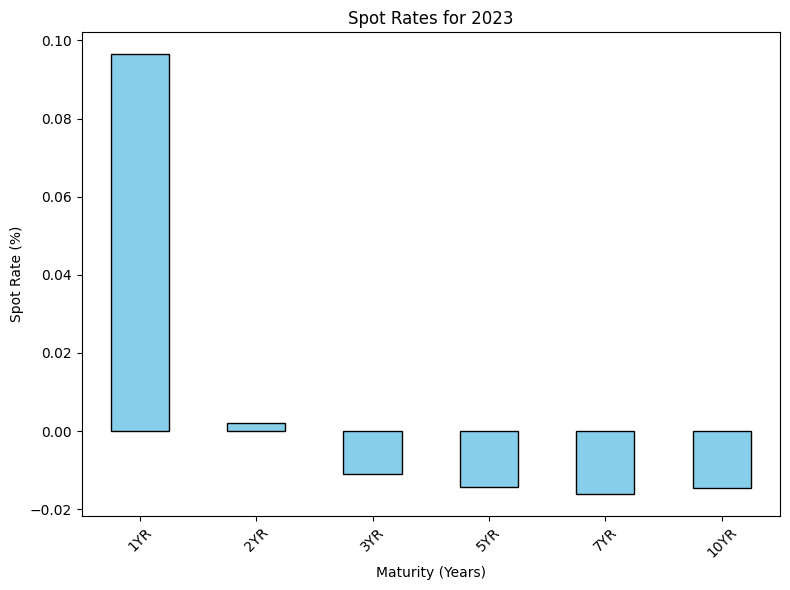

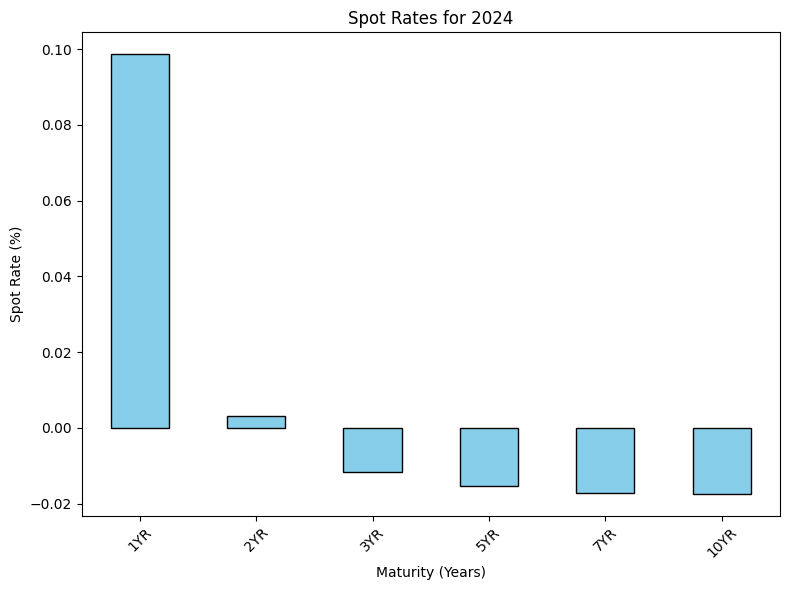

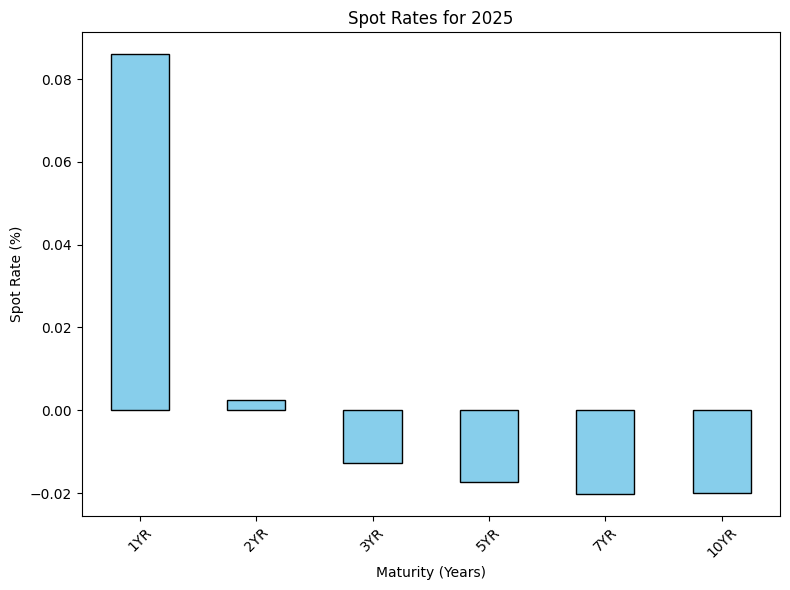

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def bootstrapped_rates(bond_data):
    """
    bootstap spot rate for each yr from bond yeilds and princes
    """
    
    '''Bootstrapping spot rates for each year from bond yields and prices.
Method: Make a dictionary to store spot rates for each year.
Go through each row of bond data and look at the maturity dates (1, 2, 3, 4, 5, and 10 years). Grab the column names for yields and prices.'''
    all_spot_rates = {}
    for index, row in bond_data.iterrows():
        start_date = row['start_date']
        spot_rates = []
        computed_years = []  
        # Go through each row of bond data and look at the maturity dates (1, 2, 3, 4, 5, and 10 years). Grab the column names for yields and prices
        for i in [1, 2, 3, 5, 7, 10]:  
            maturity_col = f"{i}YR"
            price_col = f"PX_{i}"
        #if binds price/yeild data missing --> skips
            if maturity_col not in bond_data.columns or price_col not in bond_data.columns:
                continue
            try:
                yield_rate = float(row[maturity_col]) / 100  # coverstions per --> dec
            except ValueError: #invalid vals
                print(f"Skipping invalid yield at {start_date}: {row[maturity_col]}")
                continue  
            #extracting price 
            #if bond pirce is 0 --> skips
            price = row[price_col]  # Bond price




            if pd.isna(price) or price == 0:
                print(f"Skipping {i}-year bond at {start_date} due to missing/zero price.")
                continue
            #coupoun formula : yeildrate * 100
            coupon = yield_rate * 100 





            #cash flow 
            # disconts past year coupon payments using prev spot rates.
            #curr spot rate forumla 
            '''
            SP = ((finalpayment - disc cash flow) / bond price) -1
            '''
            sum_of_discounted_cash_flows = 0
            for year in range(1, i):  # prev yr disc cash flows
                if year - 1 < len(spot_rates):
                    sum_of_discounted_cash_flows += coupon / (1 + spot_rates[year - 1]) ** year
            try:
                spot_rate_current = ((coupon + 100 - sum_of_discounted_cash_flows) / price) ** (1 / i) - 1
            except ZeroDivisionError:
                print(f"Skipping {i}-year bond at {start_date} due to division by zero.")
                continue
            spot_rates.append(spot_rate_current)
            computed_years.append(i)

        # stores spot rate for the specifc yr to dictionary 
        # 
        all_spot_rates[start_date] = spot_rates

    spot_rate_df = pd.DataFrame.from_dict(all_spot_rates, orient="index", columns=[f"{m}YR" for m in computed_years])
    spot_rate_df.index = pd.to_datetime(spot_rate_df.index)
    return spot_rate_df

#print 
bond_data = pd.read_csv("yield_data.csv")
print(bond_data)
spot_rate_df = bootstrapped_rates(bond_data) #spotrate from bond date
print(spot_rate_df)



###################################################################################################################
#Plot_spot 
'''method 
loops from 2015 --> 2024 
if spot rate exisit then bar graph for diff maturintiy yr s
'''
for year in range(2015, 2026):
    year_date = pd.to_datetime(f"{year}-01-01")
    if year_date in spot_rate_df.index:
        plt.figure(figsize=(8, 6))
        spot_rate_df.loc[year_date].plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f"Spot Rates for {year}")
        plt.xlabel("Maturity (Years)")
        plt.ylabel("Spot Rate (%)")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No spot rate data for {year}.")

In [ ]:
'''commentary'''

## Part 2: Stochastic Interest Rate Model

In the second part of the challenge, you will use a stochastic interest rate model of your choice to forecast short-term rate evolution as well as price impacts on a hypothetical universe of bonds. You will also explore bond duration and convexity as risk measures and alternate price forecasting tools.

You will use the current SOFR rate as your starting point. You can use any interest rate model you like. If you're unsure of where to start, we recommend either of the Ho-Lee or CIR models. Resources for these models are provided below. For parameters, choose whatever you think is reasonable. Make sure you understand the model you're implementing!

Please write the following functions:

plot_rate_paths: Use your interest rate model to forecast and plot 100 sample short-term (overnight) rate paths over the next 4 years. 

plot_yield_curve: A key characteristic of fixed income is the extent to which rates affect each other. To explore this, use your interest rate model to generate ONE overnight rate path. Use this overnight rate path to forecast the evolution of longer-term rates, specifically the 3-month, 6-month, 1 year and 2 year rates. How will changes in the overnight rate impact these rates? Include comments or a text box explaining and justifying your approach.

plot_bond_prices: Using the yield curve generated above, forecast the price evolution of the following bonds over a 2-year period:
- 3-month zero-coupon bond
- 6-month zero-coupon bond
- 1-year zero-coupon bond
- BONUS: 2-year coupon bond paying 1% semiannually

calculate_duration: A function that calculates the duration of a bond given its time to maturity, yield and semiannual coupon rate

calculate_convexity: A function that calculates the convexity of a bond given its time to maturity, yield and semiannual coupon rate

BONUS: Calculate the duration and convexity of a 2-year bond paying 1% coupons semiannually. Calculate the bond's NPV using the first entry in your 2-year rate path. Using the rest of the rate path, estimate the price of the bond over time using its duration and convexity to relate price changes to rate changes. Do these results match with your original price forecast? If so, why might they differ? Comment on your results.

Resources:

CIR- https://www.finance-tutoring.fr/the-cox-ingersoll-ross-(cir)-model-simply-explained/

Ho-Lee- https://www.bensblog.tech/fixed_income/HoLee_Model/

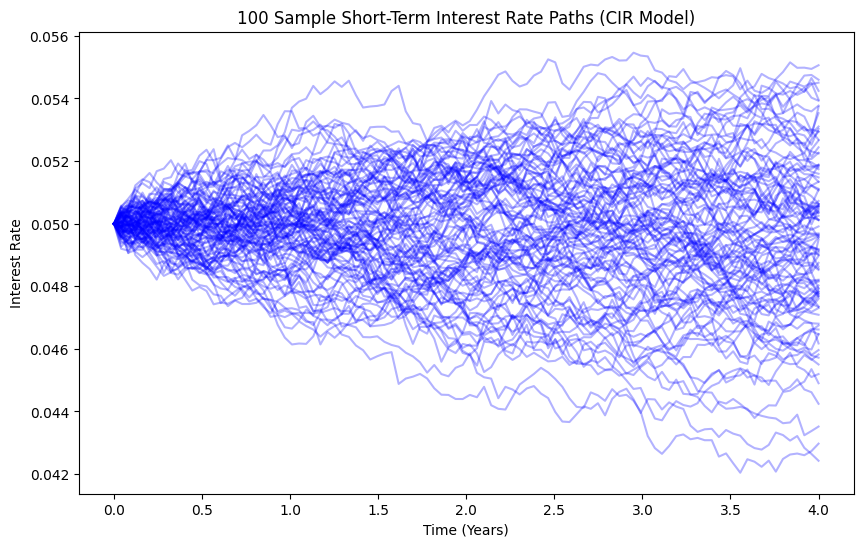

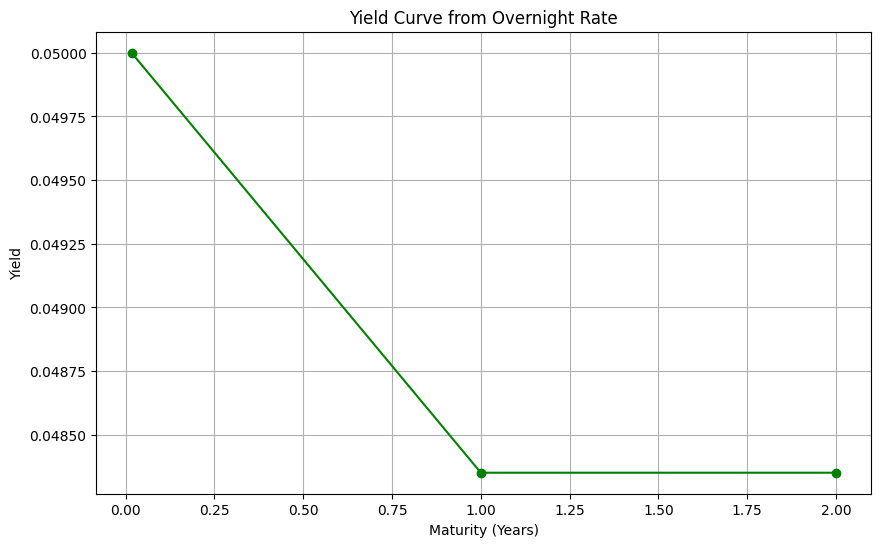

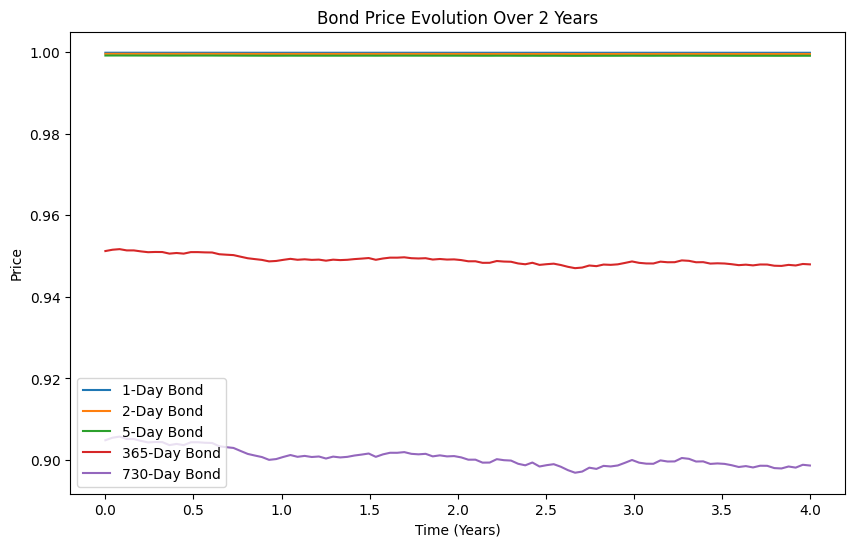

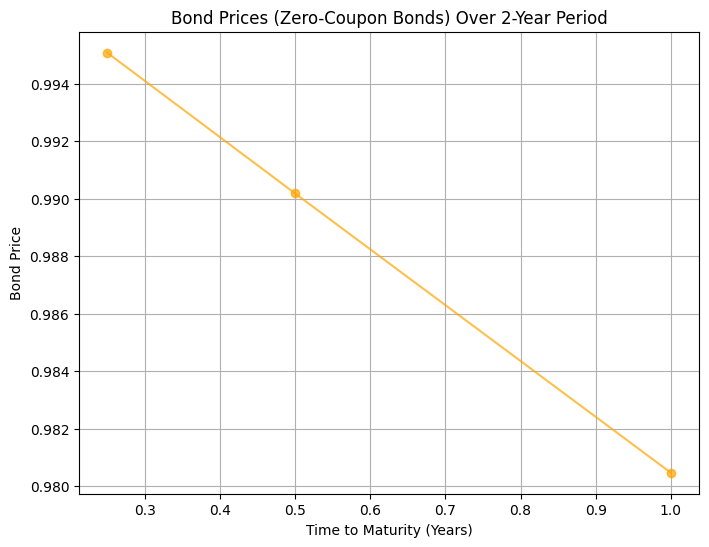

Duration: 0.1560 years
Convexity: 0.2325


In [3]:
# Part 2: Stochastic Interest Rate Model

# Necessary imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# CIR formula 
# drt = alpha(beta-rt)dt+sigmasqrt(rt)dWt
#rt+1 = rt + alpha(beta-rt)dt+sigmasqrt(rt*dt)
alpha = 0.02  
beta = 0.01   
sigma = 0.02  
r0 = 0.05    
dt = 1/252  
T = 4       
N = 252 * T 

# Simulate rate paths using the CIR model
# https://www.investopedia.com/terms/c/cox-ingersoll-ross-model.asp   <-- i use discretized cir equation to compate the rate change
'''stimulare rate path using CIR 
aplha - mean reversion speed <-- how fast rate moves to beta 
beta - long term mean lev <-- equilbrm level rate tend to
sigma - volatltiy <-- random flucation in rate 
r0 - inial interst rate 
dt - tie step <-- 1.252 tradin days 
T - total stimulation time (yr)
N - total number of steps 
num_path - 100 (stimulated paths )
'''

'''
first intilaize stroage for interst rate 
using a matrix --> rows = paths, colums time 
then stimulate interst rate ovements fover time. so i loop iteraters each time step and computee the next interest rate from cir formula 


Reasion why use discretized cir eq 
 - mean reversion since interst rates tend to move towards long-term avg 
 - no non-negateive rates 
'''
def simulate_cir_paths(alpha, beta, sigma, r0, dt, T, N, num_paths=100):
    rates = np.zeros((num_paths, N))
    rates[:, 0] = r0
    for i in range(1, N):
        # dr = alpha (beta -rt)dt + sigma sqrt(dr*dt)
        dr = alpha * (beta - rates[:, i-1]) * dt + sigma * np.sqrt(rates[:, i-1] * dt) * np.random.normal(0, 1, num_paths) #discretized cir equation 
        rates[:, i] = np.maximum(rates[:, i-1] + dr, 0)  # checks intersate rate isn't neg
    return rates

# plotting 100 sample rate paths
def plot_rate_paths(alpha, beta, sigma, r0, dt, T, N):
    rates = simulate_cir_paths(alpha, beta, sigma, r0, dt, T, N)
    plt.figure(figsize=(10, 6))
    plt.plot(np.linspace(0, T, N), rates.T, color='blue', alpha=0.3)
    plt.title('100 Sample Short-Term Interest Rate Paths (CIR Model)')
    plt.xlabel('Time (Years)')
    plt.ylabel('Interest Rate')
    plt.show()
plot_rate_paths(alpha, beta, sigma, r0, dt, T, 100)



#####################################################################################################################################################################
# Plot yield curve based on overnight rate
def plot_yield_curve(alpha, beta, sigma, r0, dt, T, N):
    '''
    relationship bwt long term vs. short term rate 
    multiple interest rate paths based on the CIR model
    calcuates avg overnight rate at diff maturities 
    rts 
    '''
    rates = simulate_cir_paths(alpha, beta, sigma, r0, dt, T, N)
    overnight_rate = rates[0, :]  
    # sourcs stack overflow 
    # https://stackoverflow.com/questions/57079539/r-yield-curve-package-to-extract-term-rates-in-days
    # https://stackoverflow.com/questions/20054243/np-mean-vs-np-average-in-python-numpy 
    maturities = [1/365, 3/365, 6/365, 1, 2]  # Time to maturity in years # https://www.adventuresincre.com/lenders-calcs/#:~:text=Take%20note%20that%20although%20dividing,the%20extra%20day%20in%20a
    yield_curve = []
    for maturity in maturities:
        rate_at_maturity = np.mean(overnight_rate[:int(maturity * N)])
        yield_curve.append(rate_at_maturity)
#plot plot plot 
    plt.figure(figsize=(10, 6))
    plt.plot(maturities, yield_curve, marker='o', color='green')
    plt.title('Yield Curve from Overnight Rate')
    plt.xlabel('Maturity (Years)')
    plt.ylabel('Yield')
    plt.grid(True)
    plt.show()
plot_yield_curve(alpha, beta, sigma, r0, dt, T, 100)
############################################################################################################

def bond_price(interest_rate, time_to_maturity):
    return np.exp(-interest_rate * time_to_maturity)

# 2yrs bond princes
def plot_bond_prices(alpha, beta, sigma, r0, dt, T, N):
    rates = simulate_cir_paths(alpha, beta, sigma, r0, dt, T, N)
    overnight_rate = rates[0, :] 
    maturities = [1/365, 3/365, 6/365, 1, 2]  # maturies for bonds (in years)
    bond_prices = []
    for maturity in maturities:
        bond_prices.append([bond_price(rate, maturity) for rate in overnight_rate])
    # plot plot 
    plt.figure(figsize=(10, 6))
    for i, maturity in enumerate(maturities):
        plt.plot(np.linspace(0, T, N), bond_prices[i], label=f'{int(maturity*365)}-Day Bond')
    plt.title('Bond Price Evolution Over 2 Years')
    plt.xlabel('Time (Years)')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
plot_bond_prices(alpha, beta, sigma, r0, dt, T, 100)

#############################################################################################################

#newewe 
# Function to compute the price of a zero-coupon bond
def zero_coupon_bond_price(rates, maturity):
    """
    wasn't sure which bond price. so antoehr method was to compute the price of zero coupn bond in given list of rates and maturity rates
    so using final rate eat each time step and compute price at final time, i used averge rate. then i generated the cir paths 
    Compute the price of a zero-coupon bond given a list of rates and maturity in years.
    caluates bond prices at diff maturies based on stimulated rates and then takes avg price across all paths 
    """
    rate_at_maturity = np.mean(rates[:, -1])  #avergage 
    price = np.exp(-rate_at_maturity * maturity)  # discountriy rate of maturity
    return price

def plot_bond_prices(r0, alpha, beta, sigma, T=2, dt=1/252, num_paths=100):
    rates = simulate_cir_paths(r0, alpha, beta, sigma, T, dt, num_paths) 
    maturities = [0.25, 0.5, 1]  
    bond_prices = []
    for maturity in maturities:
        prices = [zero_coupon_bond_price(rates, maturity) for _ in range(num_paths)]
        bond_prices.append(np.mean(prices))  # Take average price across all paths
    # Plot 2nd graph (2yr period)
    plt.figure(figsize=(8, 6))
    plt.plot(maturities, bond_prices, marker='o', color='orange', linestyle='-', alpha=0.7)
    plt.title('Bond Prices (Zero-Coupon Bonds) Over 2-Year Period')
    plt.xlabel('Time to Maturity (Years)')
    plt.ylabel('Bond Price')
    plt.grid(True)
    plt.show()
plot_bond_prices(r0, alpha, beta, sigma)



####################################################################################################################################################


# Duration of a bond
# video https://www.youtube.com/watch?v=E72Ju52Eu5E
# i used chat to retrive the forumla for calulating the duration which is 
# using the macaulay dration of bond which mesures weighted avg time until vonds cash flow is recived 
def calculate_duration(time_to_maturity, yield_rate, coupon_rate):
    num_periods = int(time_to_maturity * 2)  # Semi-annual periods
    coupon_payment = coupon_rate / 2
    bond_price = 0
    weighted_sum = 0
    for t in range(1, num_periods + 1):
        period = t / 2
        discount_factor = (1 + yield_rate / 2) ** (2 * period)
        bond_price += coupon_payment / discount_factor
        weighted_sum += (period * coupon_payment) / discount_factor
    bond_price += 1 / (1 + yield_rate / 2) ** num_periods  # Add face value
    duration = weighted_sum / bond_price
    return duration

# Convexity of a bond
# https://www.investopedia.com/terms/c/convexity.asp 
# https://hive.blog/hive-167922/@abhaysview/bonds-maths-and-it-s-implementation-in-python

def calculate_convexity(time_to_maturity, yield_rate, coupon_rate):
    num_periods = int(time_to_maturity * 2)  # Semi-annual periods
    coupon_payment = coupon_rate / 2
    bond_price = 0
    weighted_sum = 0
    for t in range(1, num_periods + 1):
        period = t / 2
        discount_factor = (1 + yield_rate / 2) ** (2 * period)
        bond_price += coupon_payment / discount_factor
        weighted_sum += (period ** 2 * coupon_payment) / discount_factor
    bond_price += 1 / (1 + yield_rate / 2) ** num_periods  # Add face value
    convexity = weighted_sum / bond_price
    return convexity

# i was getting name erorro so i defined the arguments just as an example 
time_to_maturity = 2 
yield_rate = 0.04  
coupon_rate = 0.07 

duration = calculate_duration(time_to_maturity, yield_rate, coupon_rate)
convexity = calculate_convexity(time_to_maturity, yield_rate, coupon_rate)

print(f"Duration: {duration:.4f} years")
print(f"Convexity: {convexity:.4f}")





## Commentary

In the cell below, write any takeaways you had from this challenge or any clarifications about any of your choices:

tbh tis was super confusing at first 😵‍💫 
The CIR model seemed really complicated, and I had no clue how all the pieces fit together. But once I broke it down, it started making (some) sense.

my thinking:

1. First, I had to figure out what the CIR model even does—basically, it stops interest rates from going negative and makes them move toward some average value.
2. Then, I split up the equation: one part pulls rates toward a long-term value, and another part adds randomness (aka the unpredictable market stuff).
3. I ran a bunch of simulations to see how rates actually behaved over time.
4. I looked at how changing the overnight rate shifts everything else, like bond prices and long-term rates.
Question about overate rate section 
I think ff the overnight rate goes up, short-term rates jump first, and long-term rates rise more slowly. If it drops, long-term rates don’t react as fast since they depend on expectations for the future.

Biggest struggle? Debugging the math and making sure rates didn’t randomly go negative. Took forever to get plots that actually made sense. 😅

## References

In the cell below, list any resources you used to help you with this coding challenge (including ChatGPT), and what you got out of each resource:

included it in the code 

## Submission

Submit your file using the format "firstname_lastname_fi".ipynb

Ex. andrew_thomas_fi.ipynb